# Introduction
## Overview
The dataset at hand is a comprehensive collection of sales records for a fictional
company. It comprises 9800 entries with 18 distinct features, providing detailed
information on various aspects of the sales transactions. This dataset includes
information such as order details, customer demographics, product categories, sales
figures, and shipping information.

## Dataset Description

The dataset contains the following features:

**Row ID:** A unique identifier for each row.

**Order ID:** A unique identifier for each order.

**Order Date:** The date when the order was placed.

**Ship Date:** The date when the order was shipped.

**Ship Mode:** The shipping mode used for the order (e.g., Second Class, Standard Class).

**Customer ID:** A unique identifier for each customer.

**Customer Name:** The name of the customer.

**Segment:** The market segment to which the customer belongs (e.g., Consumer, Corporate).

**Country:** The country where the order was placed.

**City:** The city where the order was placed.

**State:** The state where the order was placed.

**Postal Code:** The postal code of the delivery address.

**Region:** The region where the order was placed (e.g., South, West).

**Product ID:** A unique identifier for each product.

**Category:** The category of the product (e.g., Furniture, Office Supplies).

**Sub-Category:** The sub-category of the product (e.g., Bookcases, Chairs).

**Product Name:** The name of the product.

**Sales:** The sales amount for the product.

<a href="https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting">Dataset Link</a>

## Purpose of Analysis
The purpose of this exploratory data analysis (EDA) is to gain insights into the sales patterns, customer behavior, and
product performance. Through univariate, bivariate, and multivariate analyses, we aim to identify trends, correlations, and 
anomalies that can inform business strategies and decision-making processes.

<b>I'll write Python code that covers the main steps of EDA, including:</b>

1)Loading the data

2)Inspecting the data

3)Handling missing values

4)Time Series Analysis

5)Univariate Analysis

6)Bivariate analysis

7)Multivariate anlysis


## Loading the data

In [2]:
# loading dataset
df=pd.read_csv('train.csv')
print("Loading Sucessfull!")

Loading Sucessfull!


## Inspecting the data

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
#Drop Unwanted Rows
df=df.drop(columns=["Row ID","Order ID","Product ID"])

In [6]:
df.describe()

,Postal Code,Sales
count,9789.000000,9800.000000
mean,55273.322403,230.769059
std,32041.223413,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,58103.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9800   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 15     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Postal Code     │  11 │   0.11 │   55000 │   32000 │   1000 │   23000 │  58000 │  90000 │  99000 │ ▅▅▃▂▃▇  │  │
│ │ Sales           │   0 │      0 │     230 │     630 │   0.44 │      17 │     54 │    210 │  23000 │    ▇    │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Order Date                   │      0 │          0 │                           1 │                    9800 │  │
│ │ Ship Date                    │      0 │          0 │                           1 │                    9800 │  │
│ │ Ship Mode                    │      0 │          0 │                           2 │                   19600 │  │
│ │ Customer ID                  │      0 │          0 │                           1 │                    9800 │  │
│ │ Customer Name                │      0 │          0 │                           2 │                   19665 │  │
│ │ Segment                      │      0 │          0 │                         1.2 │                   11546 │  │
│ │ Country                      │      0 │          0 │                           2 │                   19600 │  │
│ │ City                         │      0 │          0 │                         1.4 │                   13927 │  │
│ │ State                        │      0 │          0 │                         1.2 │                   11470 │  │
│ │ Region                       │      0 │          0 │                           1 │                    9800 │  │
│ │ Category                     │      0 │          0 │                         1.6 │                   15709 │  │
│ │ Sub-Category                 │      0 │          0 │                           1 │                    9800 │  │
│ │ Product Name                 │      0 │          0 │                         5.6 │                   54544 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Handling missing values

In [8]:
missing_data=df.isnull().sum()
print(f"Missing Data: {missing_data}")

Missing Data: Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


Infer,data contains 11 **Null values** from **Postal code** column 

In [9]:
#view the missing data
df[df['Postal Code'].isnull()]

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Conclude that 11 missing values of postal code has same state and city 

**From Google search** : Postal code for vermont state and burlington city is 5402

In [10]:
#handle missing values
df['Postal Code'] = df['Postal Code'].fillna(5402)

In [11]:
to_check = df.isnull().sum()
print(f"Check for Missing Data: {to_check}")

Check for Missing Data: Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [12]:
#Check for Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Data: {duplicates}")

Duplicate Data: 1


In [13]:
#to change orderdate and ship date to datetime
df['Order Date']=pd.to_datetime(df['Order Date'],format="%d/%m/%Y")
df['Ship Date']=pd.to_datetime(df['Order Date'],format="%d/%m/%Y")

In [14]:
df.sample(5)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
9251,2018-03-02,2018-03-02,Standard Class,KD-16615,Ken Dana,Corporate,United States,Los Angeles,California,90008.0,West,Office Supplies,Binders,Catalog Binders with Expanding Posts,107.648
9032,2018-06-22,2018-06-22,Standard Class,RB-19465,Rick Bensley,Home Office,United States,Detroit,Michigan,48227.0,Central,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",487.960
432,2017-04-15,2017-04-15,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052.0,South,Office Supplies,Storage,Woodgrain Magazine Files by Perma,4.768
8032,2016-06-25,2016-06-25,First Class,MV-17485,Mark Van Huff,Consumer,United States,Houston,Texas,77041.0,Central,Office Supplies,Paper,Xerox 1884,47.952
854,2017-02-19,2017-02-19,Standard Class,GT-14710,Greg Tran,Consumer,United States,New York City,New York,10035.0,East,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,242.940


In [15]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales'],
      dtype='object')

In [16]:
#display unique columns
for column in df.columns:
    print(f"\n{column}",df[column].unique().astype(str))


Order Date ['2017-11-08' '2017-06-12' '2016-10-11' ... '2015-06-18' '2018-02-28'
 '2016-05-09']

Ship Date ['2017-11-08' '2017-06-12' '2016-10-11' ... '2015-06-18' '2018-02-28'
 '2016-05-09']

Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Customer ID ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-15250' 'PA-19060' 'CV-12805' 'CL-12565' 'RC-19960'
 'DK-13090' 'GG-14650' 'SC-20725' 'AD-10180' 'PF-19165' 'TS-21610'
 'LS-16975' 'DW-13585' 'LC-16885' 'JD-15895' 'SH-19975

<Axes: >

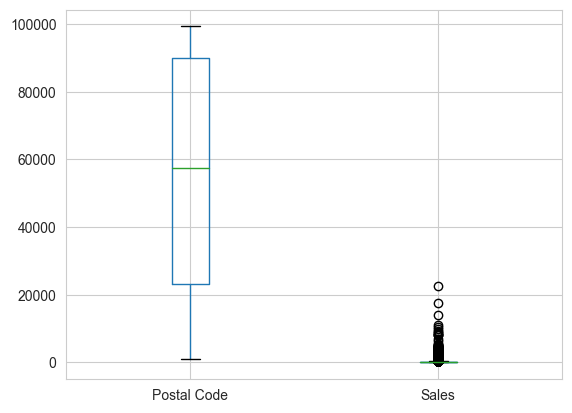

In [17]:
#Outliers 
df.boxplot()

# Time Series Analysis
### Based on sales per year

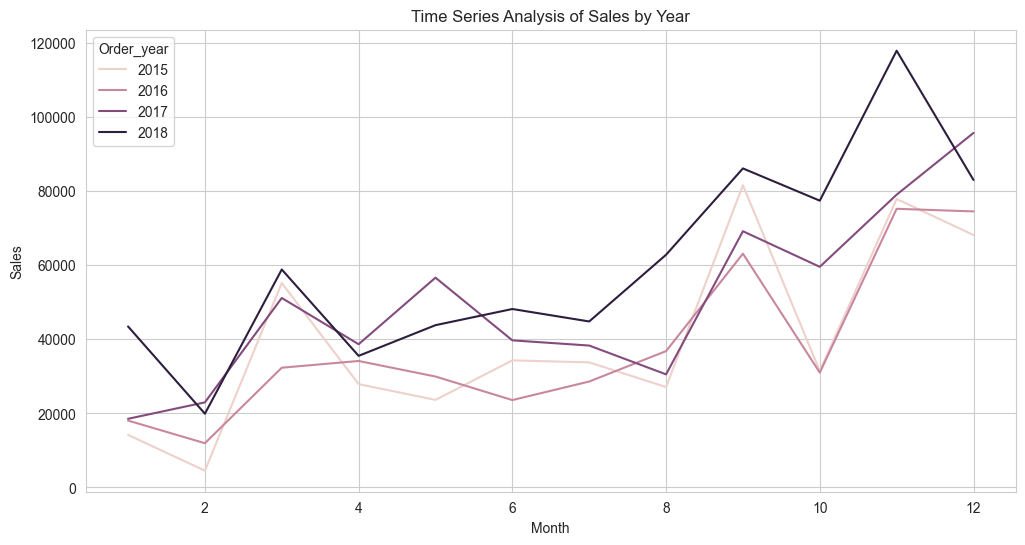

In [18]:
#Extract year,month and day from the order Date column
df['Order_year']=pd.to_datetime(df['Order Date']).dt.year
df['Order_Month']=pd.to_datetime(df['Order Date']).dt.month
df['Order_Day']=pd.to_datetime(df['Order Date']).dt.day
#Group data by year and month
grouped_data = df.groupby(['Order_year','Order_Month'])['Sales'].sum().reset_index()
#plot the time series
plt.figure(figsize=(12,6))
sns.lineplot(x='Order_Month',y='Sales',data=grouped_data,hue='Order_year')
plt.title('Time Series Analysis of Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Observation:** From the year 2015 to 2018, overall sales increased in November 2018. This suggests that sales gradually increased from January to December each year.

# Univariate analysis

For Segments Column

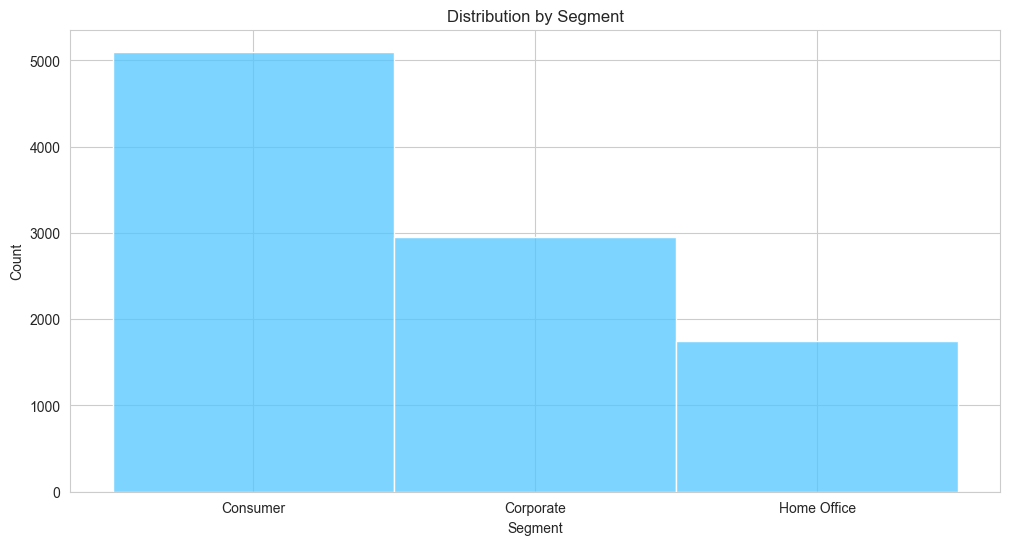

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(x='Segment',data=df,color="#51C7FF")
plt.title('Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

**Observation:** From the distribution of the segment column, more than 5,000 entries were Consumers, and less than 2,000 entries were from the Home Office segment.

In [20]:
#For category
plt.figure(figsize=(12,6))
sns.histplot(x='Category',data=df,color="#51C7FF")
plt.title('Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Observation:** From this distribution of categories, the office supplies category is at its peak, while the technology segment is at its lowest.

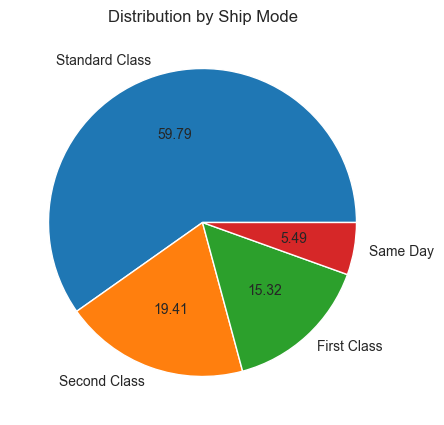

In [21]:
#For Ship Mode
ship_mode_counts=df['Ship Mode'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(ship_mode_counts,labels=ship_mode_counts.index,autopct='%1.2f')
plt.title("Distribution by Ship Mode")
plt.show()

**Observation:** The distribution of ship modes is divided into four categories. The standard class has the highest percentage at 59.79%, while the same day ship mode has the lowest percentage at 5.49%.

# Bivariate analysis

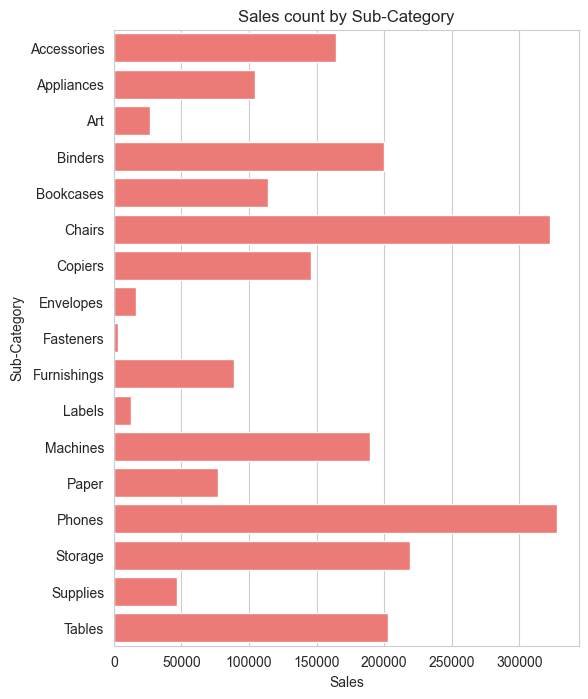

In [22]:
#sub-categories by sales
sub_categories = df.groupby("Sub-Category")["Sales"].sum().reset_index()
plt.figure(figsize=(6, 8))
sns.barplot(x="Sales", y="Sub-Category", data=sub_categories,color="#ff6863")
plt.title("Sales count by Sub-Category")
plt.show()


**Observation:** Chairs and Phones are the leading sub-categories by sales, significantly surpassing others.
Categories such as Labels and Fasteners have the lowest sales, highlighting a significant variance in product demand.

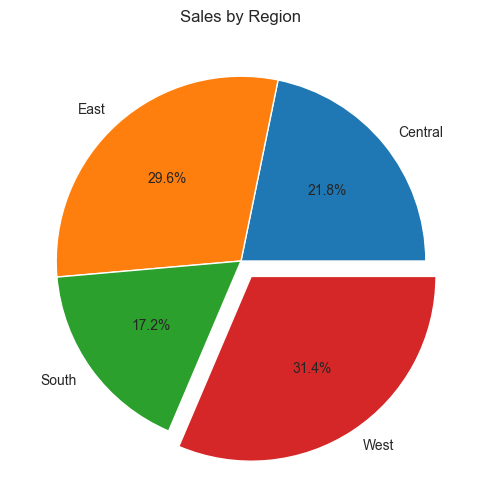

In [23]:
#Sales by region
region_sales=df.groupby("Region")["Sales"].sum().reset_index()
sales=region_sales["Sales"].tolist()
regions=region_sales["Region"].tolist()

plt.figure(figsize=(10,6))
plt.pie(sales, labels=regions,autopct='%.1f%%',explode = [0, 0, 0, 0.1])
plt.title('Sales by Region')
plt.show()

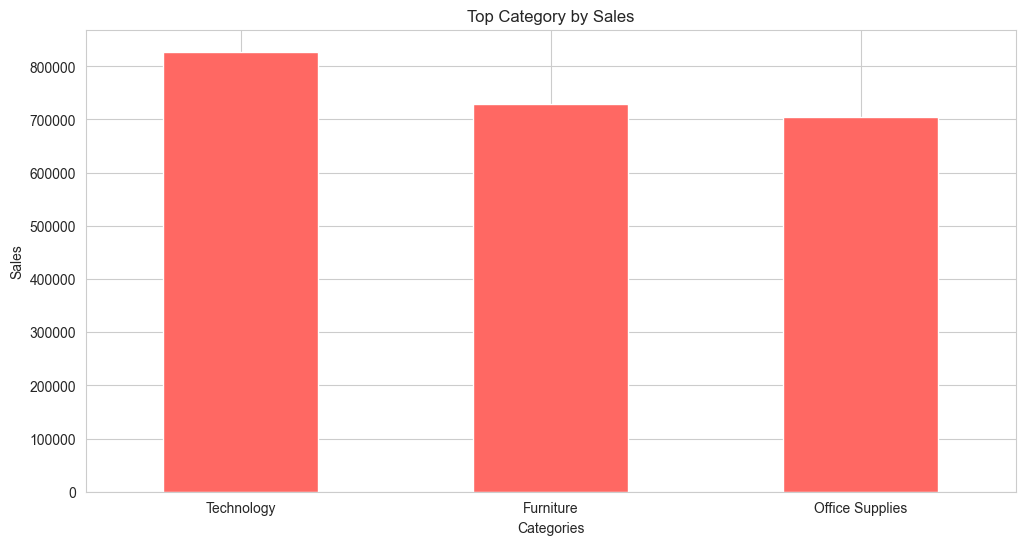

In [24]:
#Top catergories by Sales
category_sales=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
top_category=category_sales.head(3)
plt.figure(figsize=(12,6))
top_category.plot.bar(stacked=True,color="#ff6863")
plt.xticks(rotation=0)
plt.xlabel("Categories")
plt.ylabel("Sales")
plt.title("Top Category by Sales")
plt.show()

**Observation:** Technology is the highest-grossing category, with sales approaching 800,000 units while Furniture and Office Supplies follow closely, both with significant but slightly lower sales compared to Technology.


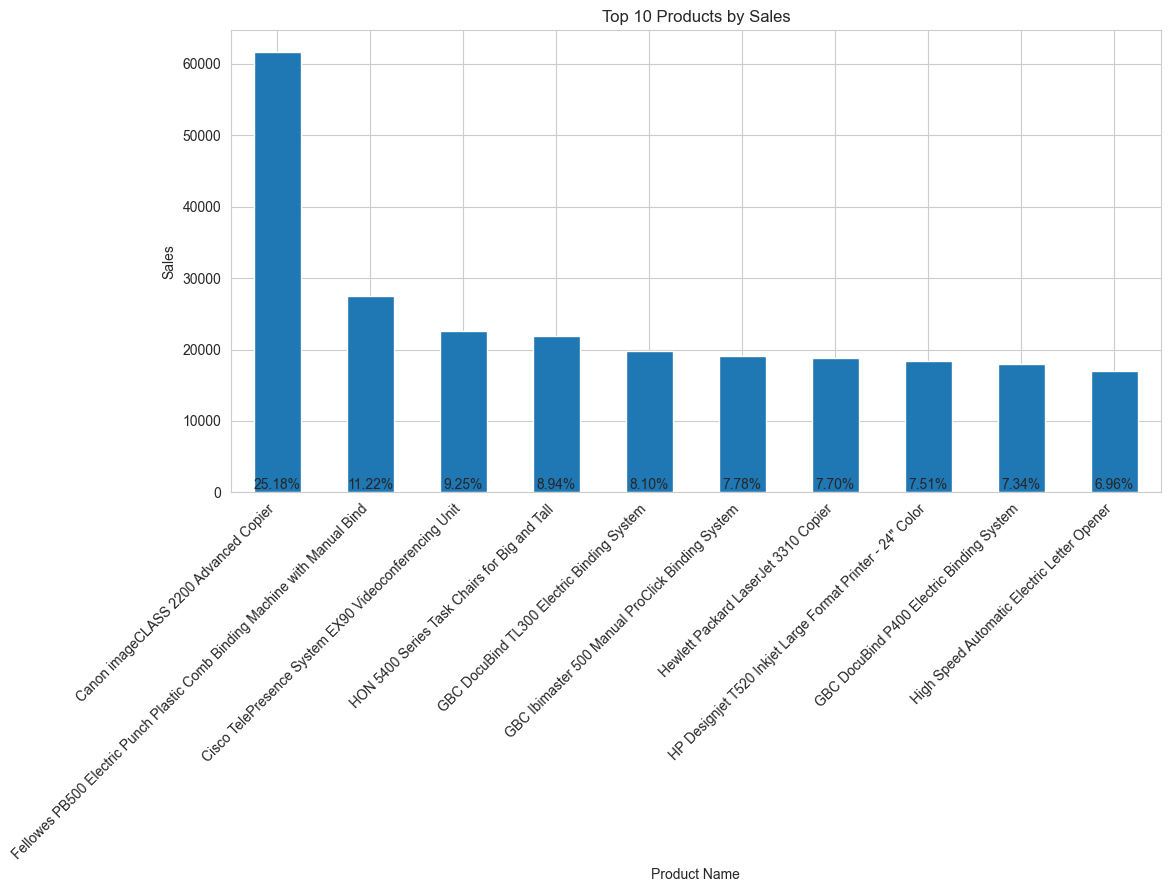

In [25]:
top_products=df.groupby('Product Name')['Sales'].sum().nlargest(10).sort_values(ascending=False)
products_sales_percentage=(top_products/top_products.sum())*100
plt.figure(figsize=(12,6))
top_products.plot.bar(stacked=True)
for i,value in enumerate(products_sales_percentage):
    plt.annotate(f'{value:.2f}%', (i,value),ha='center', va='bottom')
plt.xticks(rotation=45,ha='right')
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.title("Top 10 Products by Sales")
plt.show()

**Observation:** The Canon imageCLASS 2200 Advanced Copier leads sales, making up 25.18% of the total.
Other top products, including Cisco TelePresence System and HON Task Chairs, contribute between 6.96% and 11.22% each to overall sales.


Top States by sales

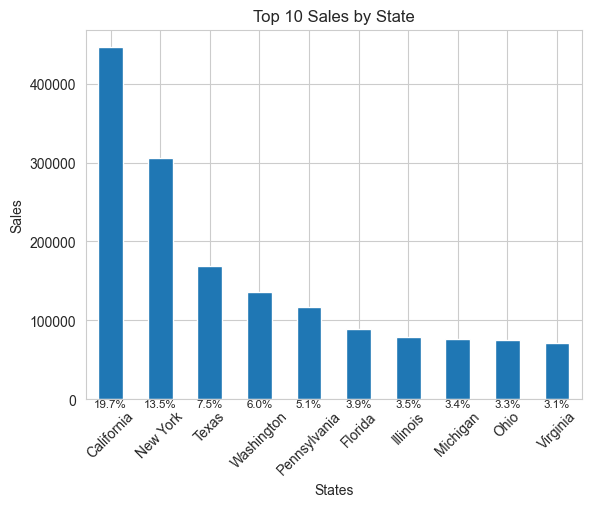

In [26]:
State_sales=df.groupby('State')['Sales'].sum().sort_values(ascending=False)
State_sales_percentage=(State_sales/State_sales.sum())*100
top_products.plot.bar(stacked=True)
for i,value in enumerate(State_sales_percentage):
    plt.annotate(f'{value:.01f}%', (i,value),ha='center', va='top',fontsize='small')
top_10_states=State_sales.head(10)  
top_10_states.plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.xlabel("States")
plt.ylabel("Sales")
plt.title("Top 10 Sales by State")
plt.show()

**Observation:** In sales, <i>California</i> has <i>19.7%</i> from the overall percentage which leads in first place amoung all the states 

# Multivariate Analysis

Region and category by sales

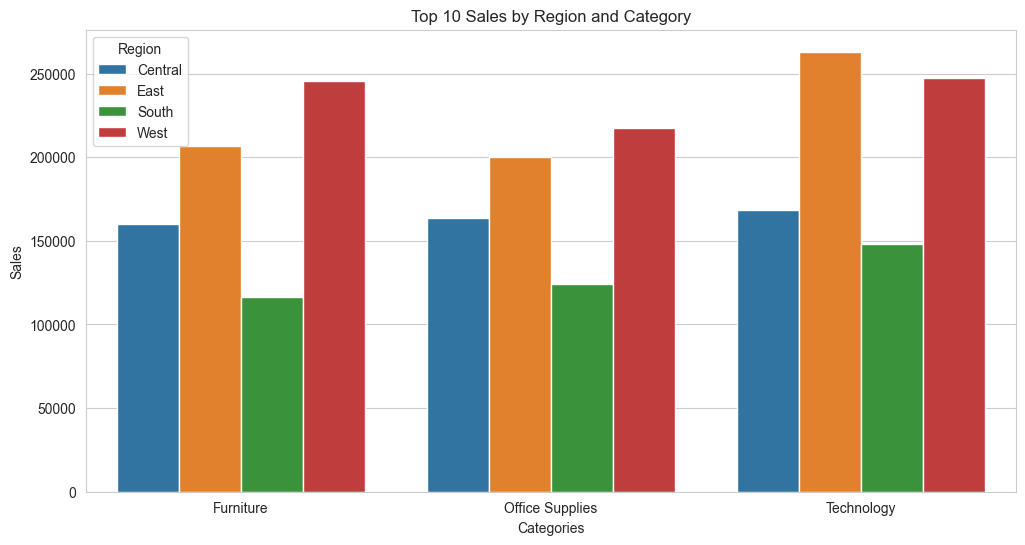

In [27]:
sales_by_category_region=df.groupby(['Category','Region'])['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Category',y='Sales',data=sales_by_category_region,hue='Region')
plt.xticks(rotation=0)
plt.xlabel("Categories")
plt.ylabel("Sales")
plt.title("Top 10 Sales by Region and Category")
plt.show()

**Observation:**

In top sales by region and category, <i>Technology</i> category hits high sales in all the regions.

# Conclusion
By the end of this analysis, we expect to have a comprehensive understanding of the sales data, which will help in identifying key areas for improvement and potential opportunities for growth.

